# Week 1

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
train_dir = 'cats_and_dogs_filtered/cats_and_dogs_filtered/train'
validation_dir = 'cats_and_dogs_filtered/cats_and_dogs_filtered/validation'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1/255)

In [4]:
train_generator = train_datagen.flow_from_directory(
train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [5]:
validation_generator = validation_datagen.flow_from_directory(
validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [8]:
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [9]:
history = model.fit(
train_generator,
    steps_per_epoch=8,
    epochs=100,
    validation_data = validation_generator,
    validation_steps=8,
    verbose=2
)

Epoch 1/100
8/8 - 4s - loss: 1.6090 - accuracy: 0.4875 - val_loss: 0.6896 - val_accuracy: 0.5430 - 4s/epoch - 516ms/step
Epoch 2/100
8/8 - 3s - loss: 0.6910 - accuracy: 0.5125 - val_loss: 0.7006 - val_accuracy: 0.4922 - 3s/epoch - 385ms/step
Epoch 3/100
8/8 - 2s - loss: 0.7114 - accuracy: 0.5500 - val_loss: 0.6859 - val_accuracy: 0.5391 - 2s/epoch - 285ms/step
Epoch 4/100
8/8 - 2s - loss: 0.6901 - accuracy: 0.5437 - val_loss: 0.6875 - val_accuracy: 0.5195 - 2s/epoch - 287ms/step
Epoch 5/100
8/8 - 2s - loss: 0.6963 - accuracy: 0.5188 - val_loss: 0.6882 - val_accuracy: 0.4883 - 2s/epoch - 280ms/step
Epoch 6/100
8/8 - 2s - loss: 0.6810 - accuracy: 0.5688 - val_loss: 0.7033 - val_accuracy: 0.4922 - 2s/epoch - 249ms/step
Epoch 7/100
8/8 - 2s - loss: 0.7039 - accuracy: 0.4750 - val_loss: 0.6932 - val_accuracy: 0.5117 - 2s/epoch - 235ms/step
Epoch 8/100
8/8 - 2s - loss: 0.6930 - accuracy: 0.5125 - val_loss: 0.6855 - val_accuracy: 0.6523 - 2s/epoch - 237ms/step
Epoch 9/100
8/8 - 2s - loss: 0.6

In [10]:
def plot_loss(history):
        #-----------------------------------------------------------
    # Retrieve a list of list results on training and test data
    # sets for each training epoch
    #-----------------------------------------------------------
    acc      = history.history[     'accuracy' ]
    val_acc  = history.history[ 'val_accuracy' ]
    loss     = history.history[    'loss' ]
    val_loss = history.history['val_loss' ]

    epochs   = range(len(acc)) # Get number of epochs

    #------------------------------------------------
    # Plot training and validation accuracy per epoch
    #------------------------------------------------
    plt.plot  ( epochs,     acc )
    plt.plot  ( epochs, val_acc )
    plt.title ('Training and validation accuracy')
    plt.figure()

    #------------------------------------------------
    # Plot training and validation loss per epoch
    #------------------------------------------------
    plt.plot  ( epochs,     loss )
    plt.plot  ( epochs, val_loss )
    plt.title ('Training and validation loss'   )

Text(0.5, 1.0, 'Training and validation loss')

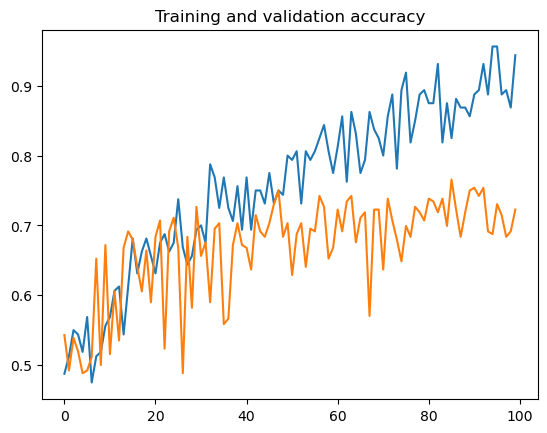

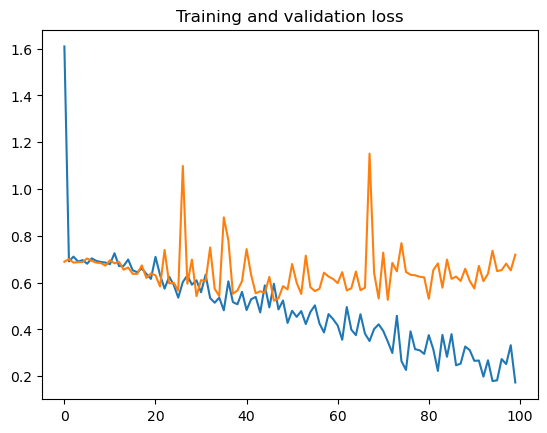

In [11]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

# Week 2

In [12]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
train_dir = 'cats_and_dogs_filtered/cats_and_dogs_filtered/train'
validation_dir = 'cats_and_dogs_filtered/cats_and_dogs_filtered/validation'

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,
                                  height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,
                                  horizontal_flip=True,fill_mode='nearest')

In [15]:
validation_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,
                                  height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,
                                  horizontal_flip=True,fill_mode='nearest')

In [17]:
train_generator = train_datagen.flow_from_directory(
train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [18]:
validation_generator = validation_datagen.flow_from_directory(
validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [20]:
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [21]:
history_with_aug = model.fit(
train_generator,
    steps_per_epoch=8,
    epochs=100,
    validation_data = validation_generator,
    validation_steps=8,
    verbose=2
)

Epoch 1/100
8/8 - 4s - loss: 1.9514 - accuracy: 0.5125 - val_loss: 0.7040 - val_accuracy: 0.5312 - 4s/epoch - 467ms/step
Epoch 2/100
8/8 - 3s - loss: 0.7122 - accuracy: 0.5125 - val_loss: 0.6933 - val_accuracy: 0.5117 - 3s/epoch - 407ms/step
Epoch 3/100
8/8 - 3s - loss: 0.6982 - accuracy: 0.4875 - val_loss: 0.6916 - val_accuracy: 0.5742 - 3s/epoch - 425ms/step
Epoch 4/100
8/8 - 3s - loss: 0.6956 - accuracy: 0.4875 - val_loss: 0.6961 - val_accuracy: 0.5039 - 3s/epoch - 430ms/step
Epoch 5/100
8/8 - 3s - loss: 0.7101 - accuracy: 0.4625 - val_loss: 0.6927 - val_accuracy: 0.5430 - 3s/epoch - 379ms/step
Epoch 6/100
8/8 - 3s - loss: 0.6982 - accuracy: 0.4812 - val_loss: 0.6926 - val_accuracy: 0.5078 - 3s/epoch - 410ms/step
Epoch 7/100
8/8 - 3s - loss: 0.6937 - accuracy: 0.5312 - val_loss: 0.6918 - val_accuracy: 0.4844 - 3s/epoch - 402ms/step
Epoch 8/100
8/8 - 3s - loss: 0.7257 - accuracy: 0.5437 - val_loss: 0.6916 - val_accuracy: 0.6211 - 3s/epoch - 420ms/step
Epoch 9/100
8/8 - 3s - loss: 0.6

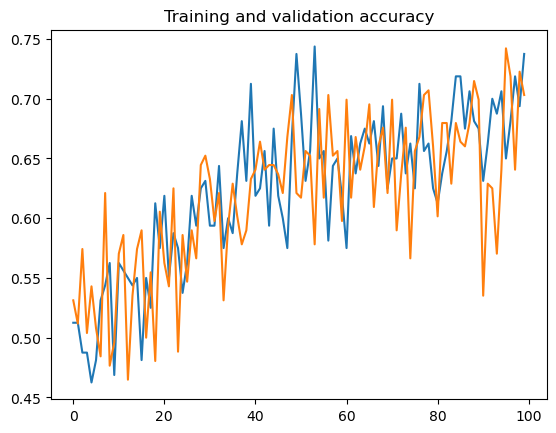

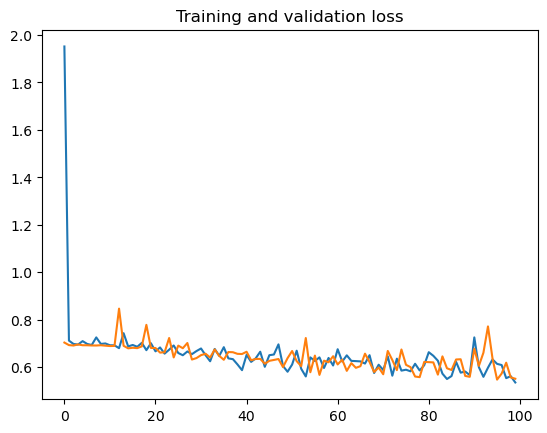

In [22]:
plot_loss(history_with_aug)

## Horse or Human

In [23]:
train_dir = 'horse-or-human'
validation_dir = 'horse-or-human'

In [32]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1/255)

In [33]:
train_generator = train_datagen.flow_from_directory(
train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 1028 images belonging to 2 classes.


In [34]:
validation_generator = validation_datagen.flow_from_directory(
validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 1028 images belonging to 2 classes.


In [35]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [36]:
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [37]:
history = model.fit(
train_generator,
    steps_per_epoch=8,
    epochs=100,
    validation_data = validation_generator,
    validation_steps=8,
    verbose=2
)

Epoch 1/100
8/8 - 2s - loss: 4.1643 - accuracy: 0.5676 - val_loss: 0.9101 - val_accuracy: 0.4570 - 2s/epoch - 298ms/step
Epoch 2/100
8/8 - 2s - loss: 0.7300 - accuracy: 0.4797 - val_loss: 0.6334 - val_accuracy: 0.6445 - 2s/epoch - 231ms/step
Epoch 3/100
8/8 - 2s - loss: 0.6351 - accuracy: 0.6687 - val_loss: 0.5251 - val_accuracy: 0.7500 - 2s/epoch - 236ms/step
Epoch 4/100
8/8 - 2s - loss: 0.6116 - accuracy: 0.6562 - val_loss: 0.4727 - val_accuracy: 0.7812 - 2s/epoch - 240ms/step
Epoch 5/100
8/8 - 2s - loss: 0.4947 - accuracy: 0.7812 - val_loss: 0.5314 - val_accuracy: 0.7188 - 2s/epoch - 243ms/step
Epoch 6/100
8/8 - 2s - loss: 0.3519 - accuracy: 0.8500 - val_loss: 0.2266 - val_accuracy: 0.9062 - 2s/epoch - 243ms/step
Epoch 7/100
8/8 - 2s - loss: 0.1881 - accuracy: 0.9250 - val_loss: 0.1342 - val_accuracy: 0.9531 - 2s/epoch - 236ms/step
Epoch 8/100
8/8 - 2s - loss: 0.6650 - accuracy: 0.7500 - val_loss: 0.2936 - val_accuracy: 0.8711 - 2s/epoch - 241ms/step
Epoch 9/100
8/8 - 2s - loss: 0.2

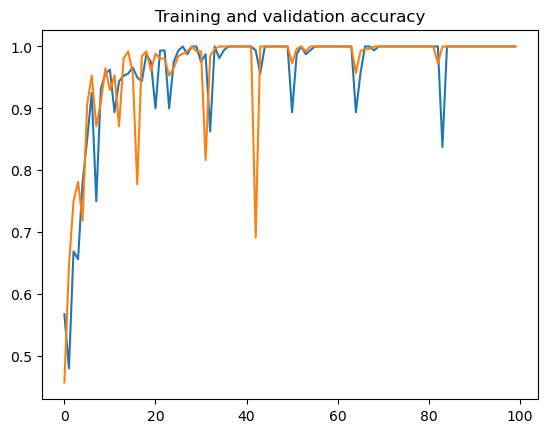

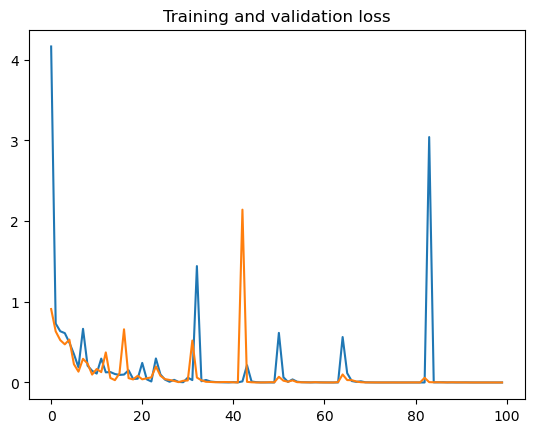

In [38]:
plot_loss(history)

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,
                                  height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,
                                  horizontal_flip=True,fill_mode='nearest')

In [25]:
validation_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,
                                  height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,
                                  horizontal_flip=True,fill_mode='nearest')

In [26]:
train_generator = train_datagen.flow_from_directory(
train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 1028 images belonging to 2 classes.


In [27]:
validation_generator = validation_datagen.flow_from_directory(
validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 1028 images belonging to 2 classes.


In [28]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [29]:
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [30]:
history_with_aug = model.fit(
train_generator,
    steps_per_epoch=8,
    epochs=100,
    validation_data = validation_generator,
    validation_steps=8,
    verbose=2
)

Epoch 1/100
8/8 - 5s - loss: 1.5389 - accuracy: 0.4750 - val_loss: 0.6957 - val_accuracy: 0.4648 - 5s/epoch - 626ms/step
Epoch 2/100
8/8 - 4s - loss: 0.6931 - accuracy: 0.6149 - val_loss: 0.7692 - val_accuracy: 0.5156 - 4s/epoch - 472ms/step
Epoch 3/100
8/8 - 4s - loss: 0.7103 - accuracy: 0.5000 - val_loss: 0.6802 - val_accuracy: 0.6641 - 4s/epoch - 446ms/step
Epoch 4/100
8/8 - 3s - loss: 0.6701 - accuracy: 0.6187 - val_loss: 0.6516 - val_accuracy: 0.7031 - 3s/epoch - 428ms/step
Epoch 5/100
8/8 - 3s - loss: 0.6611 - accuracy: 0.6622 - val_loss: 0.7409 - val_accuracy: 0.5391 - 3s/epoch - 402ms/step
Epoch 6/100
8/8 - 3s - loss: 0.6585 - accuracy: 0.6125 - val_loss: 0.6390 - val_accuracy: 0.6602 - 3s/epoch - 397ms/step
Epoch 7/100
8/8 - 3s - loss: 0.6218 - accuracy: 0.6562 - val_loss: 0.5923 - val_accuracy: 0.6992 - 3s/epoch - 385ms/step
Epoch 8/100
8/8 - 3s - loss: 0.5835 - accuracy: 0.7063 - val_loss: 0.7069 - val_accuracy: 0.5234 - 3s/epoch - 392ms/step
Epoch 9/100
8/8 - 3s - loss: 0.5

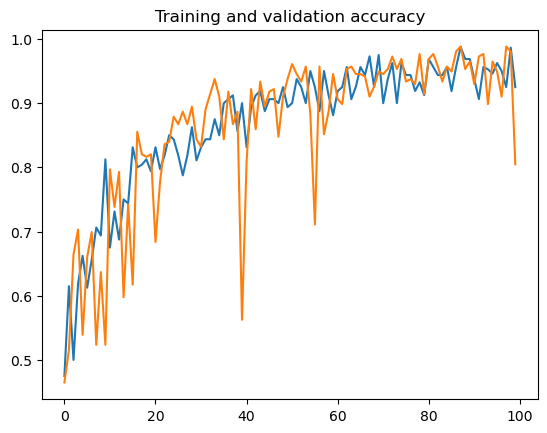

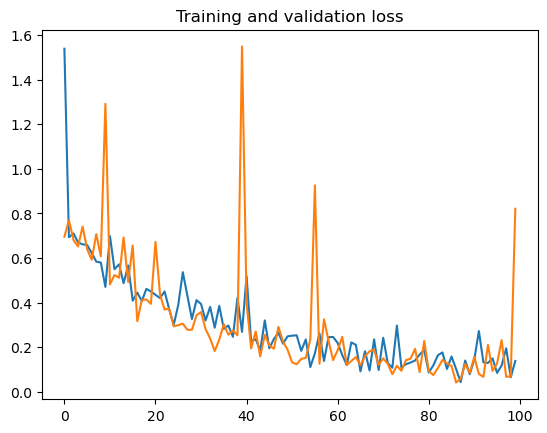

In [31]:
plot_loss(history_with_aug)